
# <font color='Black'> **Construindo a Máquina Preditiva com Machine Learning** </font>


### Descobrindo quais são as melhores variáveis

In [ ]:
# Verificando quais Features são as mais Importantes:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


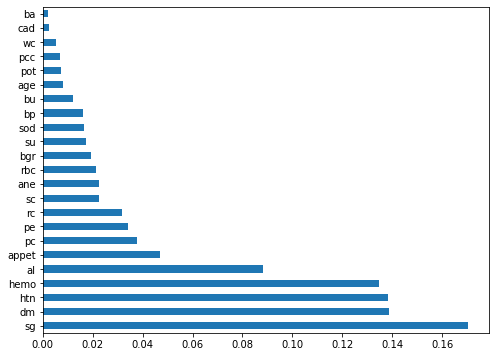

In [ ]:
# Usando o ExtraTree  para nos mostrar as Variáveis mais Importantes
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

- Vamos construir nosso modelo baseline/ inicial somente com as 8 variáveis mais importantes.

In [ ]:
#Função para ranquear as 8 mais importantes
ranked_features.nlargest(8).index

Index(['sg', 'dm', 'htn', 'hemo', 'al', 'appet', 'pc', 'pe'], dtype='object')

### 4.1 - Separando as 8 melhores variáveis para a Máquina Preditiva

In [ ]:
# Separando as 8 variáveis mais importantes em "X" para que o algoritmo treine com esses dados
X = dataset[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
X.head()

In [ ]:
#Função para ver os últimos registros
X.tail()

,sg,htn,hemo,dm,al,appet,rc,pc
395,1.020,0.0,15.7,0.0,0.0,1.0,4.9,0.0
396,1.025,0.0,16.5,0.0,0.0,1.0,6.2,0.0
397,1.020,0.0,15.8,0.0,0.0,1.0,5.4,0.0
398,1.025,0.0,14.2,0.0,0.0,1.0,5.9,0.0
399,1.025,0.0,15.8,0.0,0.0,1.0,6.1,0.0


In [ ]:
#Verificando o target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

### 4.2 - Fazendo a amostragem dos dados para Treinar (dados de treino) e para Avaliar a Máquina Preditiva (dados de teste)

In [ ]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [ ]:
print(X_train.shape)
print(X_test.shape)

### 4.3 - Criando o Baseline com o Algoritmo **RandomForest**

In [ ]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Realizando o treinamento (fit) com os dados de treino
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

In [ ]:
# Fazendo Previsões com dados de teste:
y_pred = RandomForest.predict(X_test)

In [ ]:
# Avaliando a Performance comparando com o gabarito (y) de teste:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



### 4.4 - Criando a MP com o Algoritmo **GradientBoosting**

In [ ]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier(n_estimators=2000)
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

Accuracy: 0.9916666666666667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.98      0.99        62

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



### 4.5 Salvamento da Máquina Preditiva

In [ ]:
# Creating a pickle file for the classifier
import pickle
filename = 'Maquina_Preditiva.pkl'
pickle.dump(GradientBoost, open(filename, 'wb'))